In [45]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [46]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
from sklearn.feature_selection import VarianceThreshold
converted_data = pd.get_dummies(data, drop_first=True)
var_thres = VarianceThreshold(threshold=0.5)
var_thres.fit(converted_data)


VarianceThreshold(threshold=0.5)

In [48]:
var_thres.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [49]:
# constant_columns = [column for column in converted_data.columns 
# if column not in converted_data.columns[var_thres.get_support()]]

# print(len(constant_columns))
constant_columns = [column for column in converted_data.columns
                    if column not in converted_data.columns[var_thres.get_support()]]

print(len(constant_columns))

12


In [50]:
for feature in constant_columns: 
    print(feature)

gender_male
race/ethnicity_group B
race/ethnicity_group C
race/ethnicity_group D
race/ethnicity_group E
parental level of education_bachelor's degree
parental level of education_high school
parental level of education_master's degree
parental level of education_some college
parental level of education_some high school
lunch_standard
test preparation course_none


In [51]:
converted_data.drop(constant_columns, axis =1)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [52]:
# - Replace missing numerical values with mean.
converted_data.fillna(converted_data.mean(), inplace=True)


In [53]:
#- Replace missing categorical values with mode.
for column in converted_data.select_dtypes(include=['object']).columns:
    converted_data.fillna(converted_data.mean(), inplace=True)

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])



In [54]:
# 4. Remove outliers from at least two numerical columns using the IQR method.
cols = ['writing score', 'reading score']
data_iqr = data.copy()

for column in cols:
    q1 = data_iqr[column].quantile(0.25)
    q3 = data_iqr[column].quantile(0.75)
    Iqr = q3 - q1

    lower_bound = q1 - 1.5 * Iqr
    upper_bound = q3 + 1.5 * Iqr
    data_iqr = data_iqr[(data_iqr[column] >= lower_bound) & (data_iqr[column] <= upper_bound)]

print(data_iqr.shape)


(992, 8)


In [55]:
converted_data

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,False,False,False,False,True,False,False,True,False,False,True,False
996,62,55,55,True,False,True,False,False,False,True,False,False,False,False,True
997,59,71,65,False,False,True,False,False,False,True,False,False,False,False,False
998,68,78,77,False,False,False,True,False,False,False,False,True,False,True,False


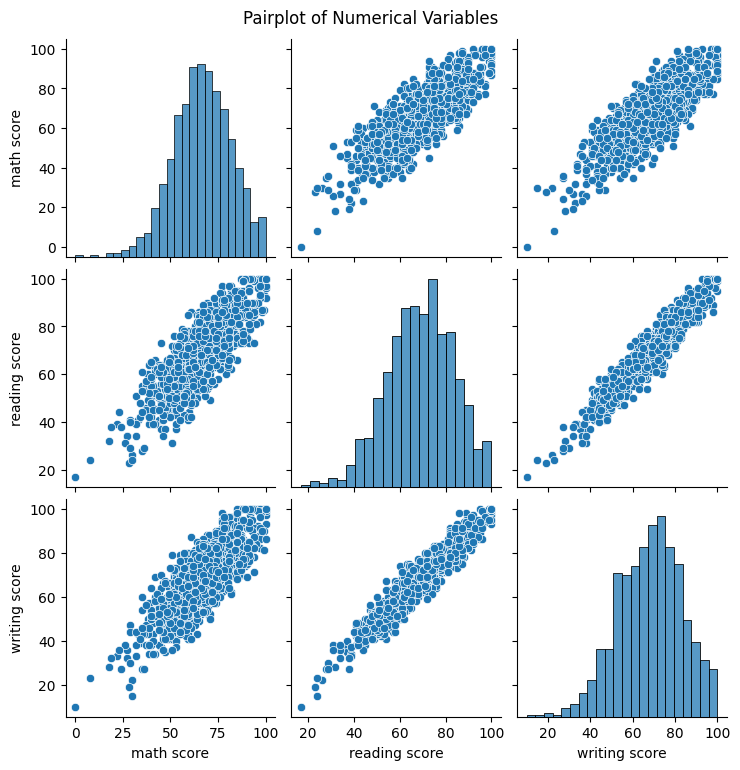

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = data.select_dtypes(include='number')
sns.pairplot(numeric_cols)
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

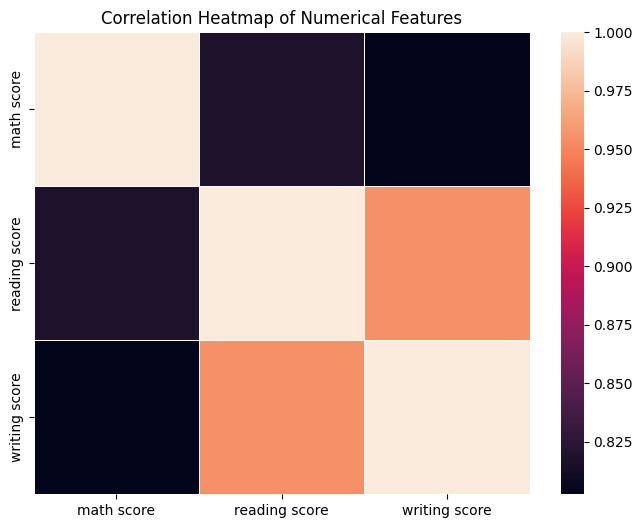

In [ ]:
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Observations for each plot
# Plot 1
# Therer is a Strong positive correlation between reading and writing scores.

# Plot 2
# Reading and writing scores have a very high positive correlation (0.95).

